# Data Preprocessing

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset


In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

### Showing the dataset


In [4]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Taking care of missing data


In [6]:
#In this step, cells with missing data will be replaced by the column mean value
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(strategy = 'mean')
imputer = imputer.fit(X[:, 1:3])

X[:, 1:3] = imputer.transform(X[:, 1:3])
new_dataset = X[:, 1:3]

print(new_dataset)

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


### Task 1 (Merging)

###### Merge Two CSV files into one CSV file by following these steps
1.  read each CSV file using the following command pd.read_csv("file_name")  eg: df1 = pd.read_csv("file_name")
2.  create two variables ("df1" abd "df2") 
3.  assign each variable to the CSV file you read
4.  print each dataframe to see how they look like
5.  merge the two dataset by using the function df1.merge(df2)
6.  print the new dataset
7.  Delete column "id" from the dataset using this function df.drop(["id"], axis=1)

In [18]:
# Write your solution here 


### Task 2 ( Feature Engineering)

Generate a new feature called "Is_senior" from the column "age"

1. add a new column to the data frame by using this commaned (df['column_name'] = None)
2. the new column shows True of the person is >= 45 and it shows False otherwise 
3. print the data frame to see the new added feature

In [17]:
# Write your solution here 



### Task1 Solution

In [10]:
df1 = pd.read_csv("Data-part-one.csv")
df2 = pd.read_csv("Data-part-two.csv")

In [5]:
print(df1)
print(df2)

   id Purchased
0   1        No
1   2       Yes
2   3        No
3   4        No
4   5       Yes
5   6       Yes
6   7        No
7   8       Yes
8   9        No
9  10       Yes
   id  Country   Age   Salary
0   1   France  44.0  72000.0
1   2    Spain  27.0  48000.0
2   3  Germany  30.0  54000.0
3   4    Spain  38.0  61000.0
4   5  Germany  40.0      NaN
5   6   France  35.0  58000.0
6   7    Spain   NaN  52000.0
7   8   France  48.0  79000.0
8   9  Germany  50.0  83000.0
9  10   France  37.0  67000.0


In [8]:
df = df1.merge(df2)

In [9]:
df

,id,Purchased,Country,Age,Salary
0,1,No,France,44.0,72000.0
1,2,Yes,Spain,27.0,48000.0
2,3,No,Germany,30.0,54000.0
3,4,No,Spain,38.0,61000.0
4,5,Yes,Germany,40.0,NaN
5,6,Yes,France,35.0,58000.0
6,7,No,Spain,NaN,52000.0
7,8,Yes,France,48.0,79000.0
8,9,No,Germany,50.0,83000.0
9,10,Yes,France,37.0,67000.0


In [13]:
df.drop(["id"], axis=1)

,Purchased,Country,Age,Salary
0,No,France,44.0,72000.0
1,Yes,Spain,27.0,48000.0
2,No,Germany,30.0,54000.0
3,No,Spain,38.0,61000.0
4,Yes,Germany,40.0,NaN
5,Yes,France,35.0,58000.0
6,No,Spain,NaN,52000.0
7,Yes,France,48.0,79000.0
8,No,Germany,50.0,83000.0
9,Yes,France,37.0,67000.0


### Task 2 Solution

In [19]:
df['IsSenior'] = None

# Junior if age < 45, Senior if age >= 45
df.loc[df['Age'] >= 45, 'IsSenior'] = True
df.loc[df['Age'] < 45, 'IsSenior'] = False
print(df)

   id Purchased  Country   Age   Salary IsSenior
0   1        No   France  44.0  72000.0    False
1   2       Yes    Spain  27.0  48000.0    False
2   3        No  Germany  30.0  54000.0    False
3   4        No    Spain  38.0  61000.0    False
4   5       Yes  Germany  40.0      NaN    False
5   6       Yes   France  35.0  58000.0    False
6   7        No    Spain   NaN  52000.0     None
7   8       Yes   France  48.0  79000.0     True
8   9        No  Germany  50.0  83000.0     True
9  10       Yes   France  37.0  67000.0    False


# Machine Learning example

## Support Vector Machine (SVM) Classifier

This example uses the SVM model to predict wether a user in a specific social network will buy the advertised product after seeing the advertisement.

### Importing the dataset

In [21]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### View part of the dataset

In [22]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Splitting the dataset into the Training set and Test set


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Applications/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVM to the Training set


In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

### Visualising the Training set results


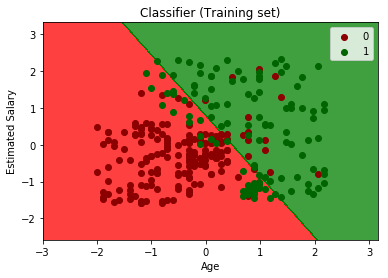

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

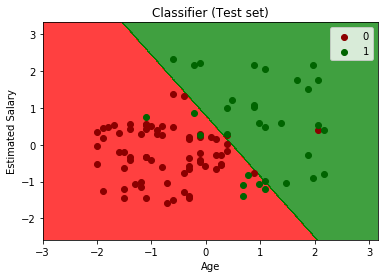

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()